In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import random

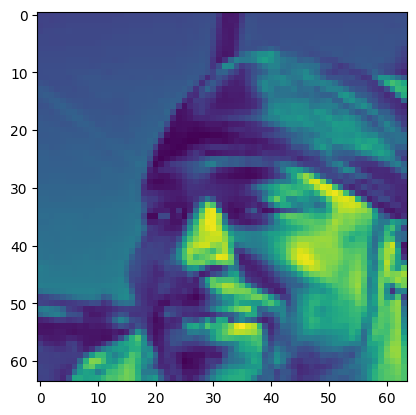

(50000, 64, 64)

In [2]:
folder_path = '/ET_study/Image_Processing/img_align_celeba/'

num_images = 50000

image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]

random_images = random.sample(image_files, num_images)

images_list = []

for image_file in random_images:
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path).crop((20, 30, 160, 180)).convert('L').resize((64, 64))
    images_list.append(np.array(image))

plt.imshow(images_list[1])
plt.show()

images = np.array(images_list)
images.shape

In [3]:
images = np.divide(images, 255)
images = images.reshape(50000, 64, 64, 1)
images.shape

(50000, 64, 64, 1)

In [5]:
# Discriminator
import tensorflow as tf

discriminator = tf.keras.models.Sequential([
    
  tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=[64,64,1]),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

noise_shape = 100

generator = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4 * 4 * 256, input_shape=(100,) ), 
  tf.keras.layers.Reshape((4, 4, 256)),
  tf.keras.layers.Conv2DTranspose(256, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(128, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding='same', activation='sigmoid')
])

generator.summary()

GAN = tf.keras.models.Sequential([generator, discriminator])

discriminator.compile(optimizer='adam', loss='binary_crossentropy')

discriminator.trainable = False
GAN.compile(optimizer='adam', loss='binary_crossentropy')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4096)              413696    
                                                                 
 reshape_1 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 8, 8, 256)        590080    
 ranspose)                                                       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 8, 8, 256)         0         
                                                                 
 batch_normalization_3 (Batc  (None, 8, 8, 256)        1024      
 hNormalization)                                                 
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 16, 16, 128)     

In [6]:
generator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4096)              413696    
                                                                 
 reshape_1 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 8, 8, 256)        590080    
 ranspose)                                                       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 8, 8, 256)         0         
                                                                 
 batch_normalization_3 (Batc  (None, 8, 8, 256)        1024      
 hNormalization)                                                 
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 16, 16, 128)     

1/1 [==============================] - 0s 440ms/step
(10, 64, 64, 1)


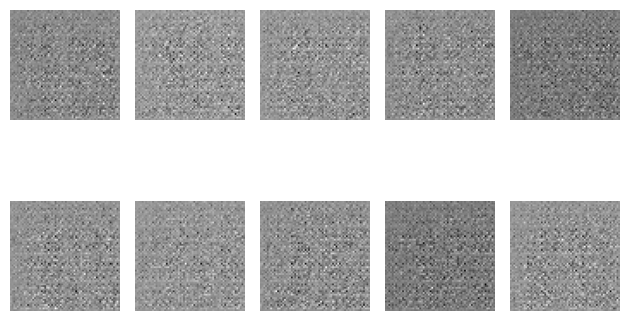

In [7]:
images_list = []
def predict_pic():
  random_n = np.random.uniform(-1, 1, size=(10, 100))

  pred = generator.predict(random_n)
  print(pred.shape)

  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(pred[i].reshape(64,64), cmap='gray')
    plt.axis('off')
  plt.tight_layout()
  plt.show()

  images_list.append(pred)
predict_pic()

epoch : 0 ----------------------------------------------------------------------------------------------------
batch : 0 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 69ms/step
Processed 1 batches out of 390
4/4 [==============================] - 0s 60ms/step
batch : 100 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 65ms/step
Processed 101 batches out of 390
4/4 [==============================] - 0s 62ms/step
batch : 200 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 65ms/step
Processed 201 batches out of 390
4/4 [==============================] - 0s 65ms/step
batch : 300 ----------------------------------------------------------------------------------------------------
4/4 [=========================

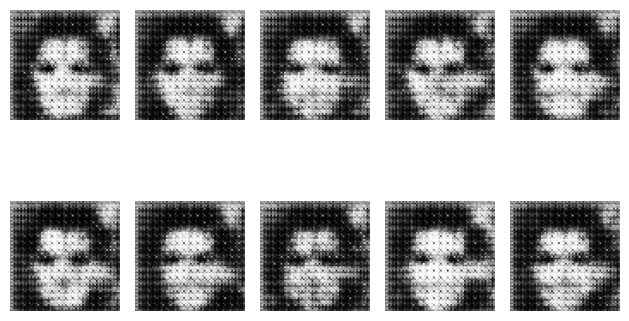

이번 0번 epoch의 최종 loss는 Discriminator0.001338040572591126 GAN 1.689639645974239e-07
epoch : 1 ----------------------------------------------------------------------------------------------------
batch : 0 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 58ms/step
Processed 391 batches out of 390
4/4 [==============================] - 0s 58ms/step
batch : 100 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 63ms/step
Processed 491 batches out of 390
4/4 [==============================] - 0s 59ms/step
batch : 200 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 62ms/step
Processed 591 batches out of 390
4/4 [==============================] - 0s 81ms/step
batch : 300 -----------------------------------------------

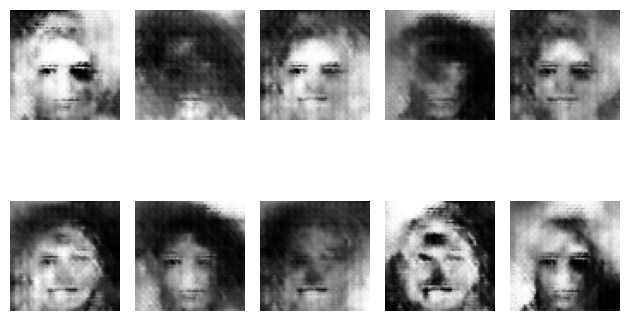

이번 10번 epoch의 최종 loss는 Discriminator0.9513415098190308 GAN 1.3696242570877075
epoch : 11 ----------------------------------------------------------------------------------------------------
batch : 0 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 72ms/step
Processed 4291 batches out of 390
4/4 [==============================] - 0s 62ms/step
batch : 100 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 73ms/step
Processed 4391 batches out of 390
4/4 [==============================] - 0s 71ms/step
batch : 200 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 71ms/step
Processed 4491 batches out of 390
4/4 [==============================] - 0s 66ms/step
batch : 300 -----------------------------------------------

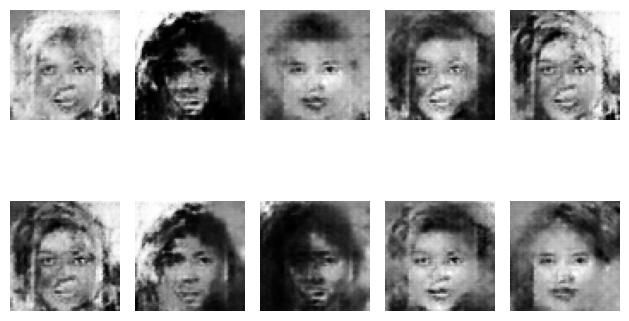

이번 20번 epoch의 최종 loss는 Discriminator1.0307629704475403 GAN 1.5893220901489258
epoch : 21 ----------------------------------------------------------------------------------------------------
batch : 0 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 84ms/step
Processed 8191 batches out of 390
4/4 [==============================] - 0s 86ms/step
batch : 100 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 75ms/step
Processed 8291 batches out of 390
4/4 [==============================] - 0s 79ms/step
batch : 200 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 84ms/step
Processed 8391 batches out of 390
4/4 [==============================] - 0s 78ms/step
batch : 300 -----------------------------------------------

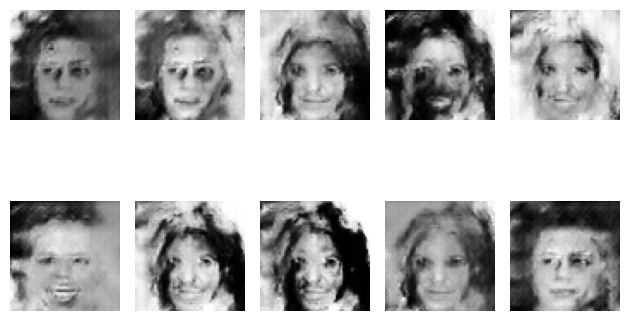

이번 30번 epoch의 최종 loss는 Discriminator1.0325940251350403 GAN 1.5985020399093628
epoch : 31 ----------------------------------------------------------------------------------------------------
batch : 0 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 94ms/step
Processed 12091 batches out of 390
4/4 [==============================] - 0s 91ms/step
batch : 100 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 87ms/step
Processed 12191 batches out of 390
4/4 [==============================] - 0s 86ms/step
batch : 200 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 86ms/step
Processed 12291 batches out of 390
4/4 [==============================] - 0s 94ms/step
batch : 300 --------------------------------------------

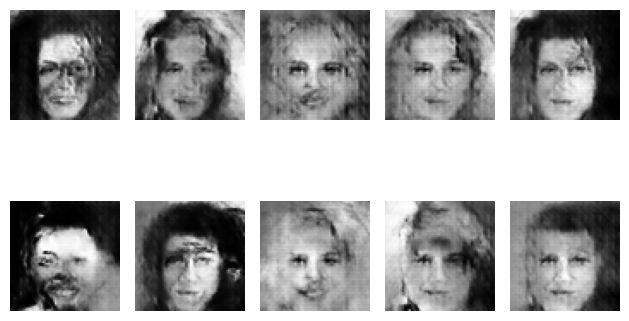

이번 40번 epoch의 최종 loss는 Discriminator0.6884159445762634 GAN 2.922816276550293
epoch : 41 ----------------------------------------------------------------------------------------------------
batch : 0 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 106ms/step
Processed 15991 batches out of 390
4/4 [==============================] - 0s 109ms/step
batch : 100 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 114ms/step
Processed 16091 batches out of 390
4/4 [==============================] - 0s 104ms/step
batch : 200 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 0s 103ms/step
Processed 16191 batches out of 390
4/4 [==============================] - 0s 106ms/step
batch : 300 ---------------------------------------

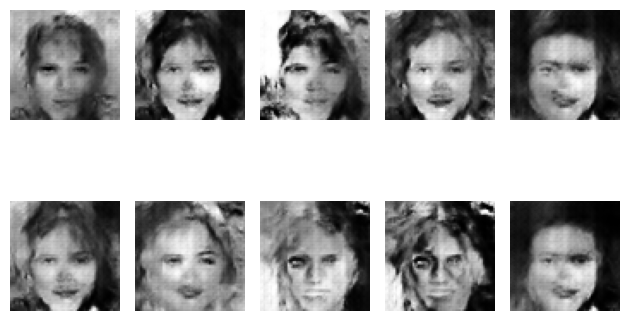

이번 50번 epoch의 최종 loss는 Discriminator0.9100174605846405 GAN 2.2369534969329834
epoch : 51 ----------------------------------------------------------------------------------------------------
batch : 0 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 1s 147ms/step
Processed 19891 batches out of 390
4/4 [==============================] - 1s 158ms/step
batch : 100 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 1s 137ms/step
Processed 19991 batches out of 390
4/4 [==============================] - 1s 142ms/step
batch : 200 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 1s 138ms/step
Processed 20091 batches out of 390
4/4 [==============================] - 1s 144ms/step
batch : 300 --------------------------------------

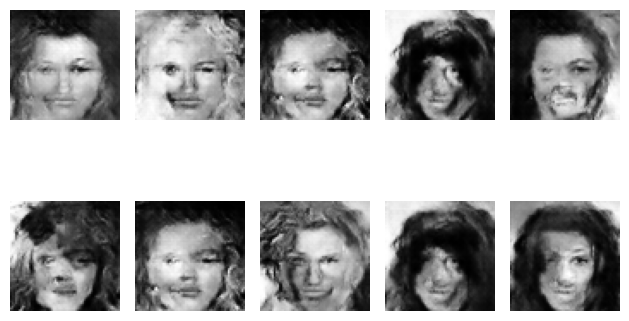

이번 60번 epoch의 최종 loss는 Discriminator0.7781541347503662 GAN 2.454235315322876
epoch : 61 ----------------------------------------------------------------------------------------------------
batch : 0 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 1s 180ms/step
Processed 23791 batches out of 390
4/4 [==============================] - 1s 168ms/step
batch : 100 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 1s 184ms/step
Processed 23891 batches out of 390
4/4 [==============================] - 1s 186ms/step
batch : 200 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 1s 193ms/step
Processed 23991 batches out of 390
4/4 [==============================] - 1s 197ms/step
batch : 300 ---------------------------------------

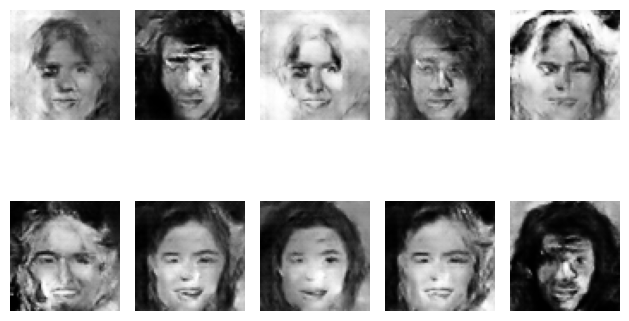

이번 70번 epoch의 최종 loss는 Discriminator0.8011319637298584 GAN 2.5356478691101074
epoch : 71 ----------------------------------------------------------------------------------------------------
batch : 0 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 1s 225ms/step
Processed 27691 batches out of 390
4/4 [==============================] - 1s 273ms/step
batch : 100 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 1s 271ms/step
Processed 27791 batches out of 390
4/4 [==============================] - 1s 269ms/step
batch : 200 ----------------------------------------------------------------------------------------------------
4/4 [==============================] - 1s 253ms/step
Processed 27891 batches out of 390
4/4 [==============================] - 1s 263ms/step
batch : 300 --------------------------------------

In [12]:
X_data = images

# 로깅 변수 초기화
processed_batches = 0

for epoch in range(300):
    print(f'epoch : {epoch}', '-'*100)

    for batch in range(50000//128):
        if batch % 100 == 0:
            print(f'batch : {batch}', '-'*100)

        # Discriminator 트레이닝
        real_img = X_data[batch*128:(batch+1)*128]
        correct = np.ones(shape=(128, 1))
        loss1 = discriminator.train_on_batch(real_img, correct)

        random_num = np.random.uniform(-1, 1, size=(128, 100))
        fake_img = generator.predict(random_num)
        wrong = np.zeros(shape=(128, 1))
        loss2 = discriminator.train_on_batch(fake_img, wrong)

        # generator 트레이닝

        noise = np.random.uniform(-1, 1, size=(128, 100))
        Y = np.ones(shape=(128, 1))

        loss3 = GAN.train_on_batch(random_num, correct)

        # 로깅 변수 업데이트
        processed_batches += 1

        if batch % 100 == 0:
            print(f'Processed {processed_batches} batches out of {50000//128}')

    if epoch % 10 == 0:
        predict_pic()
        print(f'이번 {epoch}번 epoch의 최종 loss는 Discriminator{loss1+loss2} GAN {loss3}')